In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp

# Laboratorio 04: Raíces

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales 2024-II*

---

#1
¿Para que ángulo el area del segmento circular es igual a un cuarto del area de una circunferencia?

- Muestre que la expresión que permite resolver este problema será:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- Construya una grafica para $\theta$  ¿Alrededor de que punto esta solución?(Para este punto se recomienda emplear `dataframe`).

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.

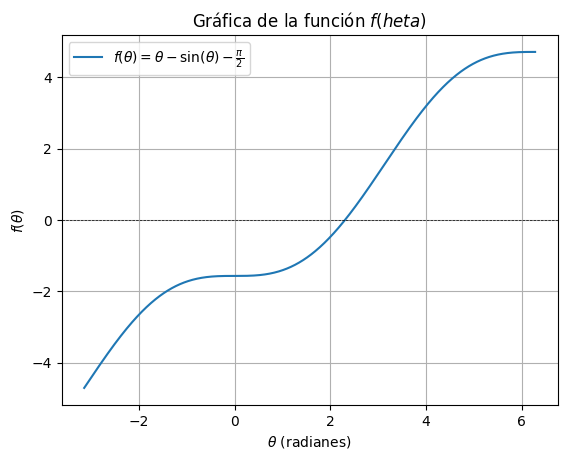

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Definir la función
def f(theta):
    return theta - np.sin(theta) - np.pi/2

# Crear un rango de valores para theta
theta_values = np.linspace(-np.pi, 2*np.pi, 1000)
f_values = f(theta_values)

# Crear un DataFrame para almacenar los valores
df = pd.DataFrame({'theta': theta_values, 'f(theta)': f_values})

plt.plot(df['theta'], df['f(theta)'], label=r'$f(\theta) = \theta - \sin(\theta) - \frac{\pi}{2}$')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel(r'$\theta$ (radianes)')
plt.ylabel(r'$f(\theta)$')
plt.title('Gráfica de la función $f(\theta)$')
plt.legend()
plt.grid(True)
plt.show()

La solución está alrededor de 2.

In [ ]:
from scipy.optimize import fsolve, bisect, newton, root_scalar, fixed_point

In [ ]:
#definir la funcion igualada a cero
f= lambda x: x-np.sin(x)-np.pi/2
a=-np.pi
b=2*np.pi
#definir funcion despejando x
g= lambda x: np.sin(x)+np.pi/2

In [ ]:
#biseccion
root_b=bisect(f,a,b)
root_p=fixed_point(g,a)
root_n=newton(f,a)
print(root_b)
print(root_p)
print(root_n)

2.3098814600098128
2.309881460010057
2.3098814600100575


# 2

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, bisect, newton, root_scalar, fixed_point

In [ ]:
e=0.9672671
T=75.96000
t0=1986.1113
t=1986.250  #t=t0+0.139
M= 2*np.pi*(t-t0)/T
E=np.linspace(0,1,100)


In [ ]:
def f(E):
    return E-e*np.sin(E)-M

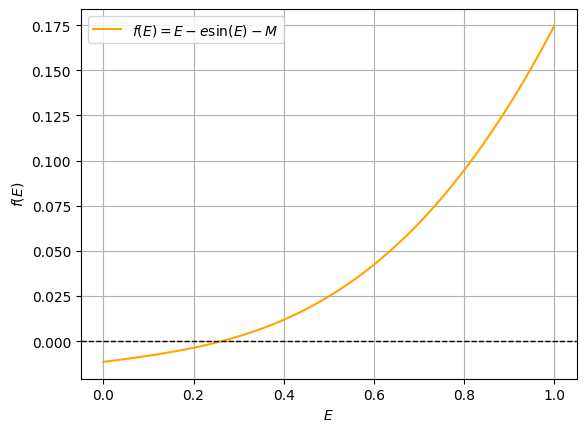

In [ ]:
plt.plot(E, f(E), label=r'$f(E) = E - e\sin(E) - M$', color='orange')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Línea y=0
plt.grid(True)  # Dashed grid with transparency
plt.xlabel('$E$')
plt.ylabel('$f(E)$')
plt.legend() #importante para que se vea el legend
plt.show()

In [ ]:
#Solucionamos la ecuacion
'''
usamos la aproximacion de M porque e es cercano a 0
'''
from scipy.optimize import fsolve
solucion=fsolve(f,M)[0]
print(solucion)

0.2621129523698606


In [ ]:
#Ahora lo que haremos es utilizar la solucion de la ecuacion f(E) y variar el tiempo
e=0.9672671
T=75.96000
t0=1986.1113
tf=1986.250  #t=t0+0.139
t_v=np.linspace(1986.1113,2063.0713,100) #desde t0 hasta t0+T
M_f = lambda t_v:2*np.pi*(t_v-t0)/T
print(M)

0.011472851528510141


In [ ]:
E_a= lambda t_v: solucion-e*np.sin(solucion)-M_f(t_v)
print(E_a)

<function <lambda> at 0x7fedfd31dbc0>


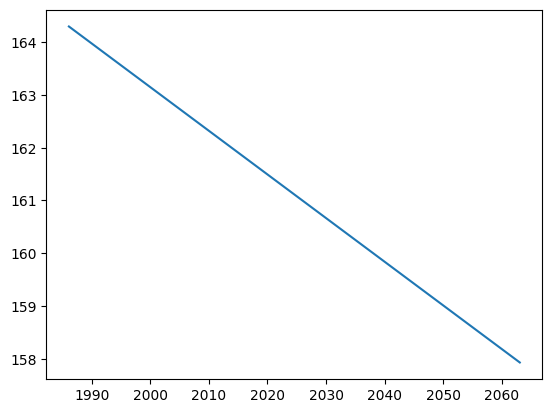

In [ ]:
plt.plot(t_v,E_a(t_vector))
plt.show()

In [ ]:
#solucionamos la ecuacion trascendental con newton
x=np.linspace(1986.1113,2063.0713,100)
k=lambda x: x-e*np.sin(x)-M
root_n=newton(k,0)
root_s=root_scalar(k,method='secant',x0=0)
print('newton',root_n)
print('secant',root_s)


newton 0.26211295236999577
secant       converged: True
           flag: converged
 function_calls: 8
     iterations: 7
           root: 0.26211295236999577
         method: secant


#3
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

* La magnetización reducida empleando el metodo de la secante y Newton-Raphson(Muestre su resultado con 4 cifras)

* Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve, bisect, newton, root_scalar, fixed_point

In [ ]:
T=0.5
m=np.linspace(-1.5,1.5,100)
m_f= lambda m:m-np.tanh(m/T)
print(m_f)

<function <lambda> at 0x7ca1b4885e40>


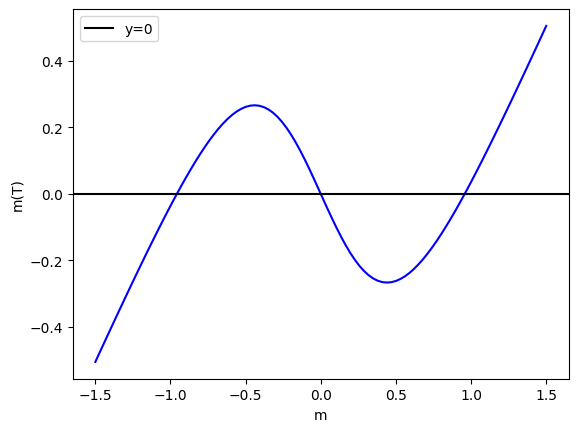

In [ ]:
plt.plot(m,m_f(m),color='blue')
plt.axhline(0,label='y=0',color='black')
plt.ylabel('m(T)')
plt.xlabel('m')
plt.legend()
plt.show()

In [ ]:
solucion_ms=root_scalar(m_f,method='secant',x0=0.5)
solucion_mn=newton(m_f,0.5)
print(solucion_ms)
print('newton',solucion_mn)

      converged: True
           flag: converged
 function_calls: 9
     iterations: 8
           root: 0.9575040240772686
         method: secant
newton 0.9575040240772686


In [ ]:
#concluimos
resultado=0.9575

In [ ]:
g_m= lambda m:np.tanh(m/T)

In [ ]:
#validamos con punto fijo
solucion_mp=fixed_point(g_m,x0=1) #importante, despejar m en la ecuacion
print(solucion_mp)

0.9575040240772689


El resultado con punto fijo es el mismo en las primeras cuatro cifras

In [ ]:
T_v=np.linspace(0.1,0.99,100)
g_=lambda T_v: np.tanh(resultado/T_v)

<ipython-input-47-aab7c12ffdcd>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


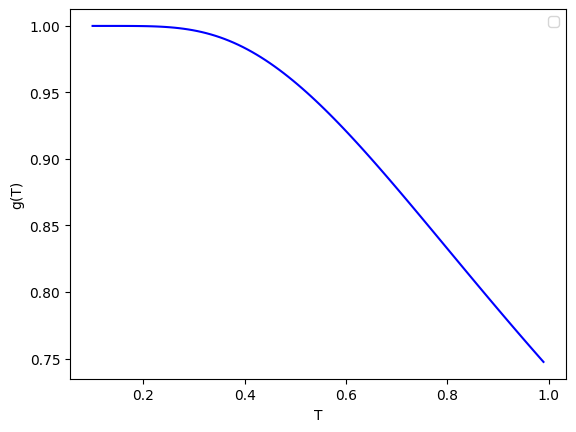

In [ ]:
plt.plot(T_v,g_(T_v),color='blue')
#plt.axhline(0,label='y=0',color='black')
plt.ylabel('g(T)')
plt.xlabel('T')
plt.legend()
plt.show()